<a href="https://colab.research.google.com/github/apoorva1208/FIFA-20-Data-Analysis/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# setting up dataset download from Kaggle
# using FIFA 20 data

from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
os.chdir('/content/gdrive/My Drive/Kaggle')
!kaggle datasets download -d stefanoleone992/fifa-20-complete-player-dataset
os.chdir('/content/')
!cp /content/gdrive/MyDrive/Kaggle/fifa-20-complete-player-dataset.zip /content/Dataset/
!unzip -q /content/Dataset/fifa-20-complete-player-dataset


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
fifa-20-complete-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace players_15.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace players_16.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace players_17.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace players_18.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace players_19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace players_20.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace teams_and_leagues.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [38]:
# import pandas and open CSV in a df

import pandas as pd

df = pd.read_csv('/content/players_20.csv')

In [39]:
# get some data info
print(df.head())

row, col = df.shape
print(row, col)

print(df.info)

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [40]:
# attempt to clean data

# drop columns that I won't need for this exercise
feature_drop = ['player_url', 'long_name', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_jersey_number', 'loaned_from', 'joined',
                'contract_valid_until', 'nation_position', 'nation_jersey_number', 'player_traits']
df.drop(columns=feature_drop, inplace=True)


In [41]:
df.isnull().sum()
df.fillna(0)
df.drop_duplicates()

,sofifa_id,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,Xiao Mingjie,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,Zhang Wei,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,Wang Haijian,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


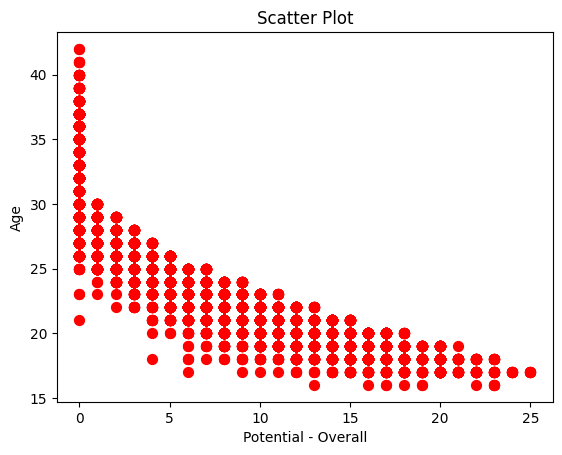

In [56]:
# visualize data
# trying to assess how the delta between potential and overall changes with age

# adding new column to have potential - overall
row, col = df.shape
delta = []
for i in range(0, row):
  # print(df['overall'][i] - df['potential'][i], df['age'][i])
  delta.append(df['potential'][i] - df['overall'][i])

df['delta'] = delta

import matplotlib.pyplot as plt

plt.scatter(df['delta'], df['age'], color='red', marker='o', s=50)

# Add labels and title
plt.xlabel('Potential - Overall')
plt.ylabel('Age')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [109]:
# using a Perceptron model to create a basic model to classify whether a player's overall is more than or less than 84 based on some given features

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

model = Perceptron()

# selecting features and creating a binary for model training
x = df[['potential', 'age', 'value_eur']]
y = (df['overall'] >= 84).astype(int)

# an 80/20 split on train/test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#confirming split sizes
#print(x_train.shape, x_test.shape)

#training perceptron
model.fit(x_train, y_train)

#make predictions

predict = model.predict(x_test)

#function to test accuracy

def accuracy(predict_data, test_data):
  correct = 0
  test = test_data.tolist()
  # print(predict_data.shape, len(test))
  for i in range(len(predict_data)):
    if predict_data[i] == test[i]:
      correct += 1
  # print(test)

  print("Number Predictions Correct: ", correct)
  print("Accuracy Rate: ", correct / len(predict_data) * 100)

accuracy(predict, y_test)

Number Predictions Correct:  3622
Accuracy Rate:  99.07002188183807
